# Telecom Churn Dataset

Dados originais: [Kaggle](https://www.kaggle.com/datasets/mnassrib/telecom-churn-datasets)

In [19]:
!pip install -U imbalanced-learn


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [78]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score




In [3]:
dados = pd.read_csv('Customer-Churn.csv')
dados.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


In [4]:
dados.shape

(7043, 18)

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Maior65Anos              7043 non-null   int64  
 1   Conjuge                  7043 non-null   object 
 2   Dependentes              7043 non-null   object 
 3   MesesDeContrato          7043 non-null   int64  
 4   TelefoneFixo             7043 non-null   object 
 5   VariasLinhasTelefonicas  7043 non-null   object 
 6   ServicoDeInternet        7043 non-null   object 
 7   SegurancaOnline          7043 non-null   object 
 8   BackupOnline             7043 non-null   object 
 9   SeguroNoDispositivo      7043 non-null   object 
 10  SuporteTecnico           7043 non-null   object 
 11  TVaCabo                  7043 non-null   object 
 12  StreamingDeFilmes        7043 non-null   object 
 13  TipoDeContrato           7043 non-null   object 
 14  PagamentoOnline         

## Variáveis categóricas

Modificação de forma manual

In [6]:
traducao_dic = {'Sim': 1,
                'Nao': 0}

dadosmodificados = dados[['Conjuge', 'Dependentes', 'TelefoneFixo',
                          'PagamentoOnline', 'Churn']].replace(traducao_dic)
dadosmodificados.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


Modificação pelo get_dummies

In [7]:
# tranformação
dummies_dados = pd.get_dummies(dados.drop(['Conjuge', 'Dependentes', 'TelefoneFixo',
                          'PagamentoOnline', 'Churn'], axis = 1)).astype(int)
# selecionou as colunas que não quer modificar porque já foram modificadas acima

# junção dos dados transformados com os que já tinhamos
dados_final = pd.concat([dadosmodificados, dummies_dados], axis = 1)

In [9]:
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,...,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29,0,1,...,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56,1,0,...,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53,1,0,...,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42,0,1,...,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70,1,0,...,1,0,0,0,1,0,0,1,0,0


In [11]:
dados_final.shape

(7043, 39)

In [12]:
dados_final.columns

Index(['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn',
       'Maior65Anos', 'MesesDeContrato', 'ContaMensal',
       'VariasLinhasTelefonicas_Nao',
       'VariasLinhasTelefonicas_SemServicoTelefonico',
       'VariasLinhasTelefonicas_Sim', 'ServicoDeInternet_DSL',
       'ServicoDeInternet_FibraOptica', 'ServicoDeInternet_Nao',
       'SegurancaOnline_Nao', 'SegurancaOnline_SemServicoDeInternet',
       'SegurancaOnline_Sim', 'BackupOnline_Nao',
       'BackupOnline_SemServicoDeInternet', 'BackupOnline_Sim',
       'SeguroNoDispositivo_Nao', 'SeguroNoDispositivo_SemServicoDeInternet',
       'SeguroNoDispositivo_Sim', 'SuporteTecnico_Nao',
       'SuporteTecnico_SemServicoDeInternet', 'SuporteTecnico_Sim',
       'TVaCabo_Nao', 'TVaCabo_SemServicoDeInternet', 'TVaCabo_Sim',
       'StreamingDeFilmes_Nao', 'StreamingDeFilmes_SemServicoDeInternet',
       'StreamingDeFilmes_Sim', 'TipoDeContrato_DoisAnos',
       'TipoDeContrato_Mensalmente', 'TipoDeContrato_UmAno

In [16]:
pd.set_option('display.max_columns', 39) # visualizar todas as colunas
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0


In [32]:
Xmaria = [[0, 0, 1, 1, 0, 0, 39.90, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
           0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1]]

## Oversampling

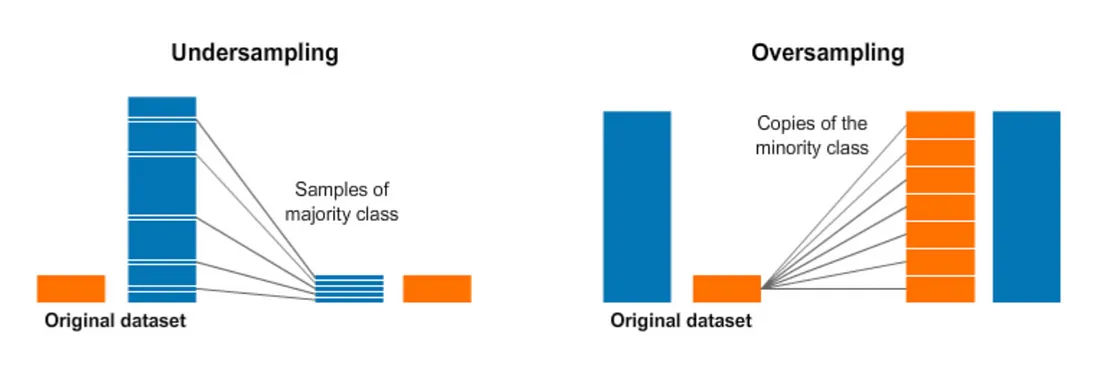

Dados desbalanceados são aqueles que possuem muitos registros para uma categoria e poucos para outra. Se não balanceamos esses dados de alguma forma, eles podem acarretar em problemas na construção de modelos e na geração de previsões.

Para verificarmos se a nossa base de dados está desbalanceada, vamos gerar um gráfico que apresenta a distribuição dos valores da nossa variável classificadora "Churn":

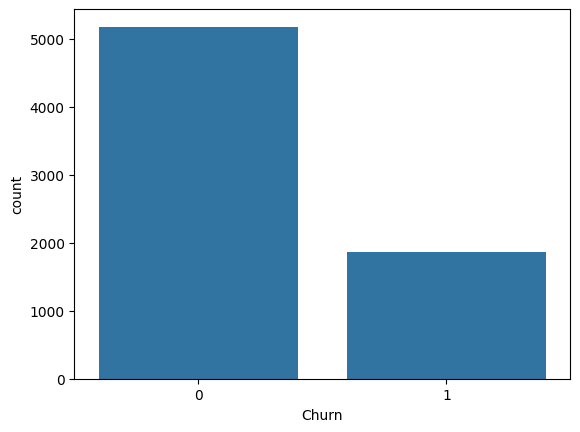

In [18]:
ax = sns.countplot(x = 'Churn', data = dados_final)

Analisando o gráfico, podemos perceber que nossa variável está desbalanceada e precisamos tratar isso. Para realizar o balanceamento dos dados, utilizaremos uma técnica chamada de Oversampling, que consiste em realizar a criação de novas observações da classe quando há menos amostras, tendo como objetivo igualar a proporção entre as categorias.

Uma das técnicas de oversampling muito utilizada é a SMOTE. Sua ideia consiste em criar observações intermediárias entre os dados que estão próximos. Por exemplo, se minutos totais por dia são 129.1 e 146.3, então será criada uma amostra com os minutos totais por dia com 137.7. Lembrando que não é necessariamente a média entre as amostras.

Vamos dar uma olhada no trecho de código utilizado para balancear o nosso dataset com o auxílio da biblioteca imbalanced-learn e da classe SMOTE.

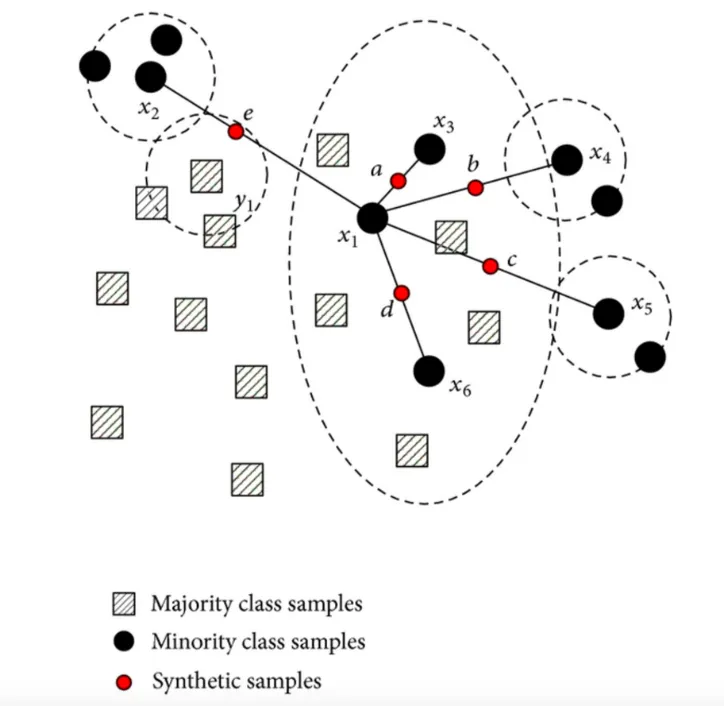

In [21]:
# Para podermos aplicar o SMOTE, devemos separar  os dados em variáveis características e resposta  

X = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']

In [22]:
smt = SMOTE(random_state = 123)  # Instancia um objeto da classe SMOTE
X, y = smt.fit_resample(X, y)  # Realiza a reamostragem do conjunto de dados

In [23]:
dados_final = pd.concat([X, y], axis=1)  # Concatena a variável target (y) com as features (X)

# Verifica se o balanceamento e a concatenação estão corretos.
dados_final.head(2)

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,Churn
0,1,0,0,1,0,1,29,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0
1,0,0,1,0,0,34,56,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0


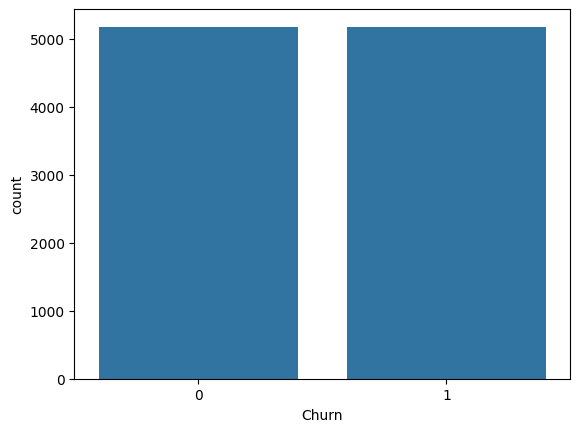

In [24]:
ax = sns.countplot(x = 'Churn', data = dados_final)  # plotando a variável target balanceada.

In [25]:
dados_final.shape

(10348, 39)

Ao analisarmos a variável classificadora ‘Churn’, podemos notar que há menos clientes contendo Sim - 1 do que Não - 0. Para que o aprendizado do algoritmo não seja afetado pela falta de informações referentes ao Churn de clientes que nos deixaram (Sim), foi necessário aplicar uma técnica de balanceamento.

Nesta situação, foi preferível aplicar o Oversampling por causa das quantidades de informações de clientes que a base como um todo possui. Lembrando que, quanto mais dados para treino, melhor será o aprendizado da máquina. Após a aplicação da técnica SMOTE, houve a verificação se o balanceamento funcionou adequadamente .

Para aprofundar no tema, indico a leitura do artigo Como lidar com dados desbalanceados em problemas de classificação. 

https://medium.com/data-hackers/como-lidar-com-dados-desbalanceados-em-problemas-de-classifica%C3%A7%C3%A3o-17c4d4357ef9

In [33]:
Xmaria

[[0,
  0,
  1,
  1,
  0,
  0,
  39.9,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1]]

In [34]:
# ymaria = ???

## Divisão em inputs e outputs

In [36]:
X = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']

Deixar todos os valores na mesma escala

In [38]:
norm = StandardScaler()

X_normalizado = norm.fit_transform(X)
X_normalizado

array([[ 1.27165114, -0.52875752, -3.06253774, ...,  1.29539717,
        -0.47958439, -0.43428742],
       [-0.7863792 , -0.52875752,  0.32652659, ..., -0.77196401,
         2.08513875, -0.43428742],
       [-0.7863792 , -0.52875752,  0.32652659, ..., -0.77196401,
         2.08513875, -0.43428742],
       ...,
       [-0.7863792 , -0.52875752,  0.32652659, ...,  1.29539717,
        -0.47958439, -0.43428742],
       [-0.7863792 , -0.52875752,  0.32652659, ..., -0.77196401,
        -0.47958439, -0.43428742],
       [-0.7863792 , -0.52875752,  0.32652659, ..., -0.77196401,
        -0.47958439, -0.43428742]])

In [39]:
X_normalizado[0]

array([ 1.27165114, -0.52875752, -3.06253774,  0.80941359, -0.40949022,
       -1.10803629, -1.33340616, -0.88378002,  3.18604176, -0.83183864,
        1.51441199, -1.04326198, -0.44617598,  0.86930072, -0.44617598,
       -0.51871996, -0.96076148, -0.44617598,  1.57836246,  1.04225252,
       -0.44617598, -0.64301486,  0.87979784, -0.44617598, -0.52396679,
        1.19022172, -0.44617598, -0.77691391,  1.20432168, -0.44617598,
       -0.78863399, -0.44648735,  0.74054467, -0.42116602, -0.4271925 ,
        1.29539717, -0.47958439, -0.43428742])

In [40]:
Xmaria_normalizado = norm.transform(pd.DataFrame(Xmaria, columns = X.columns))
Xmaria_normalizado

array([[-0.7863792 , -0.52875752,  0.32652659,  0.80941359, -0.40949022,
        -1.14971402, -0.95411127,  1.13150329, -0.31386908, -0.83183864,
        -0.6603223 ,  0.95853201, -0.44617598,  0.86930072, -0.44617598,
        -0.51871996, -0.96076148, -0.44617598,  1.57836246,  1.04225252,
         2.24126814, -0.64301486, -1.13662476,  2.24126814, -0.52396679,
         1.19022172, -0.44617598, -0.77691391, -0.83034293, -0.44617598,
         1.26801534, -0.44648735, -1.35035744,  2.37436059, -0.4271925 ,
        -0.77196401, -0.47958439,  2.30262256]])

Distância Euclidiana

Exemplo da distancia da Maria com o cliente 1

In [41]:
a = Xmaria_normalizado
b = X_normalizado[0]
a - b

array([[-2.05803033,  0.        ,  3.38906433,  0.        ,  0.        ,
        -0.04167773,  0.37929489,  2.01528331, -3.49991084,  0.        ,
        -2.17473428,  2.00179399,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         2.68744412,  0.        , -2.01642259,  2.68744412,  0.        ,
         0.        ,  0.        ,  0.        , -2.03466462,  0.        ,
         2.05664933,  0.        , -2.09090211,  2.79552661,  0.        ,
        -2.06736119,  0.        ,  2.73690997]])

In [42]:
np.square(a - b)

array([[4.23548885e+00, 0.00000000e+00, 1.14857570e+01, 0.00000000e+00,
        0.00000000e+00, 1.73703295e-03, 1.43864614e-01, 4.06136682e+00,
        1.22493759e+01, 0.00000000e+00, 4.72946920e+00, 4.00717917e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        7.22235589e+00, 0.00000000e+00, 4.06596007e+00, 7.22235589e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        4.13986011e+00, 0.00000000e+00, 4.22980648e+00, 0.00000000e+00,
        4.37187162e+00, 7.81496901e+00, 0.00000000e+00, 4.27398227e+00,
        0.00000000e+00, 7.49067620e+00]])

In [43]:
np.sum(np.square(a - b))

91.74607611191568

In [44]:
np.sqrt(np.sum(np.square(a - b)))

9.57841720285328

## Implementando o modelo

In [46]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X_normalizado, y, test_size = 0.3, 
                                                        random_state = 123)

In [47]:
knn = KNeighborsClassifier(metric = 'euclidean')
knn.fit(X_treino, y_treino)
predict_knn = knn.predict(X_teste)

In [48]:
predict_knn

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

## Modelo Bernoulli Naive Bayes

In [50]:
X_treino

array([[-0.7863792 , -0.52875752, -3.06253774, ..., -0.77196401,
         2.08513875, -0.43428742],
       [ 1.27165114,  1.89122605,  0.32652659, ..., -0.77196401,
         2.08513875, -0.43428742],
       [-0.7863792 , -0.52875752,  0.32652659, ...,  1.29539717,
        -0.47958439, -0.43428742],
       ...,
       [ 1.27165114,  1.89122605,  0.32652659, ..., -0.77196401,
         2.08513875, -0.43428742],
       [ 1.27165114,  1.89122605,  0.32652659, ...,  1.29539717,
        -0.47958439, -0.43428742],
       [-0.7863792 , -0.52875752,  0.32652659, ...,  1.29539717,
        -0.47958439, -0.43428742]])

In [51]:
y_treino

4831    0
5077    0
9023    1
4424    1
5236    0
       ..
9785    1
7763    1
5218    0
1346    1
3582    0
Name: Churn, Length: 7243, dtype: int64

In [55]:
# escolho utilizar mediana porque é o valor central dos nossos dados ordenados
mediana = np.median(X_treino)
mediana


-0.4461759755508453

In [61]:
# criamos o modelo
bnb = BernoulliNB(binarize = np.abs(mediana))
bnb.fit(X_treino, y_treino)
predict_bnb = bnb.predict(X_teste)

In [62]:
predict_bnb

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

## Árvore de decisão

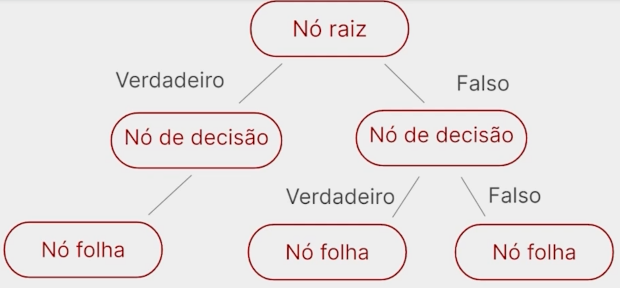

Nó folha = nó terminal = nó final

In [64]:
dtc = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dtc.fit(X_treino, y_treino)
predict_dtc = dtc.predict(X_teste)

In [65]:
predict_dtc

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

In [66]:
dtc.feature_importances_

array([0.02549595, 0.0213785 , 0.0070243 , 0.0287132 , 0.02002202,
       0.19604828, 0.12663156, 0.01197401, 0.00375611, 0.01181064,
       0.0007812 , 0.03212391, 0.        , 0.01835112, 0.        ,
       0.0173296 , 0.00922613, 0.00218699, 0.00932073, 0.01411188,
       0.00052049, 0.00904216, 0.01500505, 0.        , 0.02229008,
       0.00566188, 0.        , 0.00588238, 0.00929953, 0.        ,
       0.01278693, 0.0384897 , 0.16779593, 0.07691987, 0.01837804,
       0.02319803, 0.02173925, 0.01670455])

## Validação dos modelos

### Matriz de confusão

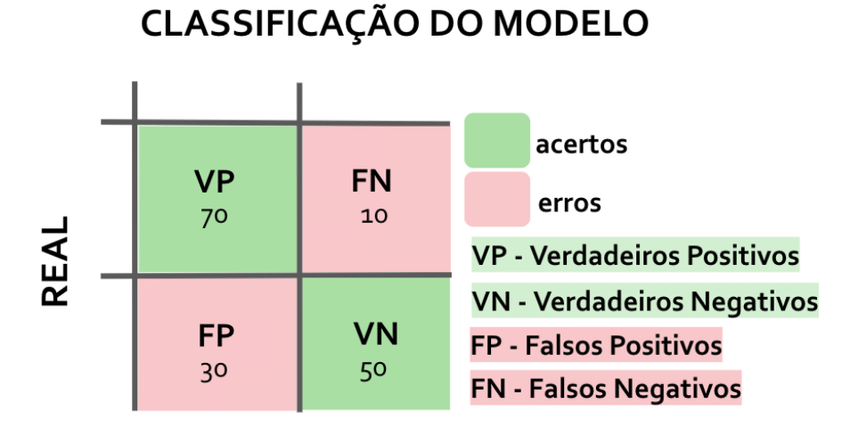

In [70]:
print(confusion_matrix(y_teste, predict_knn))

[[1233  336]
 [ 256 1280]]


In [71]:
print(confusion_matrix(y_teste, predict_bnb))

[[1084  485]
 [ 240 1296]]


In [72]:
print(confusion_matrix(y_teste, predict_dtc))

[[1244  325]
 [ 290 1246]]


### Acurácia

In [74]:
print(accuracy_score(y_teste, predict_knn))

0.8093397745571659


In [75]:
print(accuracy_score(y_teste, predict_bnb))

0.7665056360708534


In [76]:
print(accuracy_score(y_teste, predict_dtc))

0.8019323671497585


### Precisão

In [81]:
print(precision_score(y_teste, predict_knn))

0.7920792079207921


In [80]:
print(precision_score(y_teste, predict_bnb))

0.7276810780460415


In [79]:
print(precision_score(y_teste, predict_dtc))

0.7931253978357734


### Revocação (ou sensibilidade)

In [82]:
print(recall_score(y_teste, predict_knn))

0.8333333333333334


In [83]:
print(recall_score(y_teste, predict_bnb))

0.84375


In [84]:
print(recall_score(y_teste, predict_dtc))

0.8111979166666666


### Escolhendo o melhor modelo

Modelo escolhido de acordo com a precisão pois quer saber os churn, outra metrica importante seria o recall (talvez mais interessante).
A escolha do melhor modelo depende do problema que voce quer selecionar, entenda bem os seus resultados e seus modelos.

In [86]:
print('Modelo KNN:', precision_score(y_teste, predict_knn))
print('Modelo Bernoulli de Naive Bayes:', precision_score(y_teste, predict_bnb))
print('Modelo Àrvore de Decisão:', precision_score(y_teste, predict_dtc))

Modelo KNN: 0.7920792079207921
Modelo Bernoulli de Naive Bayes: 0.7276810780460415
Modelo Àrvore de Decisão: 0.7931253978357734


Arvore de decisão o melhor